# Daria Bromot - FS500047

## Classification of a simulated dataset

Import relevant packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Generate artificial data:

In [2]:
# Load data
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10000, n_features=20,n_informative=2, n_redundant=2, random_state=0)
X = pd.DataFrame(X)

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.830360,-0.330252,-0.230543,-0.461911,0.423043,1.198150,-0.598511,0.560084,1.172555,0.456654,-0.085175,0.120845,-0.514348,0.028474,1.432700,-0.667728,0.308132,-1.029791,1.733867,-0.599297
1,-0.043999,0.220658,1.600519,0.116929,0.390064,-1.421096,-0.633978,-0.184462,1.015490,1.941363,0.273527,1.762630,1.380094,-0.920554,0.209441,-0.564106,0.012611,-1.107534,2.005912,-0.566364
2,0.626718,2.100425,-0.965798,-0.128874,0.479240,2.158692,-0.660023,0.109196,0.619129,-0.316668,0.809642,-0.449486,-1.014526,1.222137,-0.817552,0.691953,-1.264811,-1.039763,0.941284,-1.053385
3,0.618236,-2.050204,0.197231,-1.349391,0.787622,-2.372554,-0.453772,-0.307125,1.386982,-0.872126,1.484745,-0.588555,0.866822,-1.746444,0.126735,0.473620,-0.425105,-0.679803,0.292287,-0.867680
4,1.432372,0.357851,0.439499,-0.748692,-0.941226,-0.395514,-0.256896,0.272549,-1.281665,1.235855,0.462032,0.163820,-0.992406,0.635776,-0.432270,-2.038404,-0.411067,-0.404224,0.361559,-0.411946


Next, we'll set a few values as missing, and will set others as outliers.

In [4]:
proportion_of_missing_values_of_variable = [0]*5 + [0.05]*8 + [0.15]*5 + [0.3]*2
for i,proportion in enumerate(proportion_of_missing_values_of_variable):
    indices = np.where(np.random.rand(len(X))<proportion)[0]
    X.loc[indices,i] = None

In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.830360,-0.330252,-0.230543,-0.461911,0.423043,1.198150,-0.598511,0.560084,1.172555,0.456654,-0.085175,0.120845,-0.514348,NaN,1.432700,-0.667728,0.308132,-1.029791,NaN,NaN
1,-0.043999,0.220658,1.600519,0.116929,0.390064,-1.421096,-0.633978,-0.184462,1.015490,1.941363,0.273527,1.762630,1.380094,-0.920554,0.209441,-0.564106,0.012611,NaN,2.005912,-0.566364
2,0.626718,2.100425,-0.965798,-0.128874,0.479240,2.158692,-0.660023,0.109196,0.619129,-0.316668,0.809642,-0.449486,-1.014526,1.222137,-0.817552,0.691953,NaN,-1.039763,NaN,-1.053385
3,0.618236,-2.050204,0.197231,-1.349391,0.787622,-2.372554,-0.453772,-0.307125,1.386982,NaN,1.484745,-0.588555,0.866822,-1.746444,0.126735,0.473620,-0.425105,-0.679803,0.292287,-0.867680
4,1.432372,0.357851,0.439499,-0.748692,-0.941226,-0.395514,-0.256896,0.272549,-1.281665,1.235855,0.462032,0.163820,-0.992406,0.635776,-0.432270,-2.038404,-0.411067,-0.404224,0.361559,-0.411946


<AxesSubplot:>

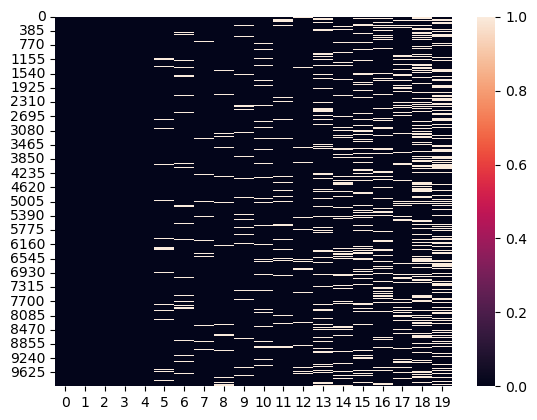

In [6]:
sns.heatmap(pd.isnull(X).astype(int))

Examine the generated dataset - its shape, variables type, summary statistics etc.

Add new cells to accomodate all the analyses and plots you'd like to make.

In [7]:
print("Shape of the dataset:", X.shape)
print("Variable types:")
print(X.dtypes)
print("Summary statistics:")
print(X.describe())
print("Missing values:")
print(X.isnull().sum())

Shape of the dataset: (10000, 20)
Variable types:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
dtype: object
Summary statistics:
                 0             1             2             3             4   \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.007816     -0.004494      0.015445     -0.002850     -0.002665   
std        1.005474      1.001875      0.999130      0.998927      1.009008   
min       -3.700948     -3.871403     -4.694588     -3.771620     -4.852118   
25%       -0.665995     -0.672802     -0.667485     -0.664023     -0.671800   
50%        0.009916     -0.000425      0.016093     -0.006344      0.001348   
75%        0.689119      0.660038      0.683355      0.644987      0.662429   
max 

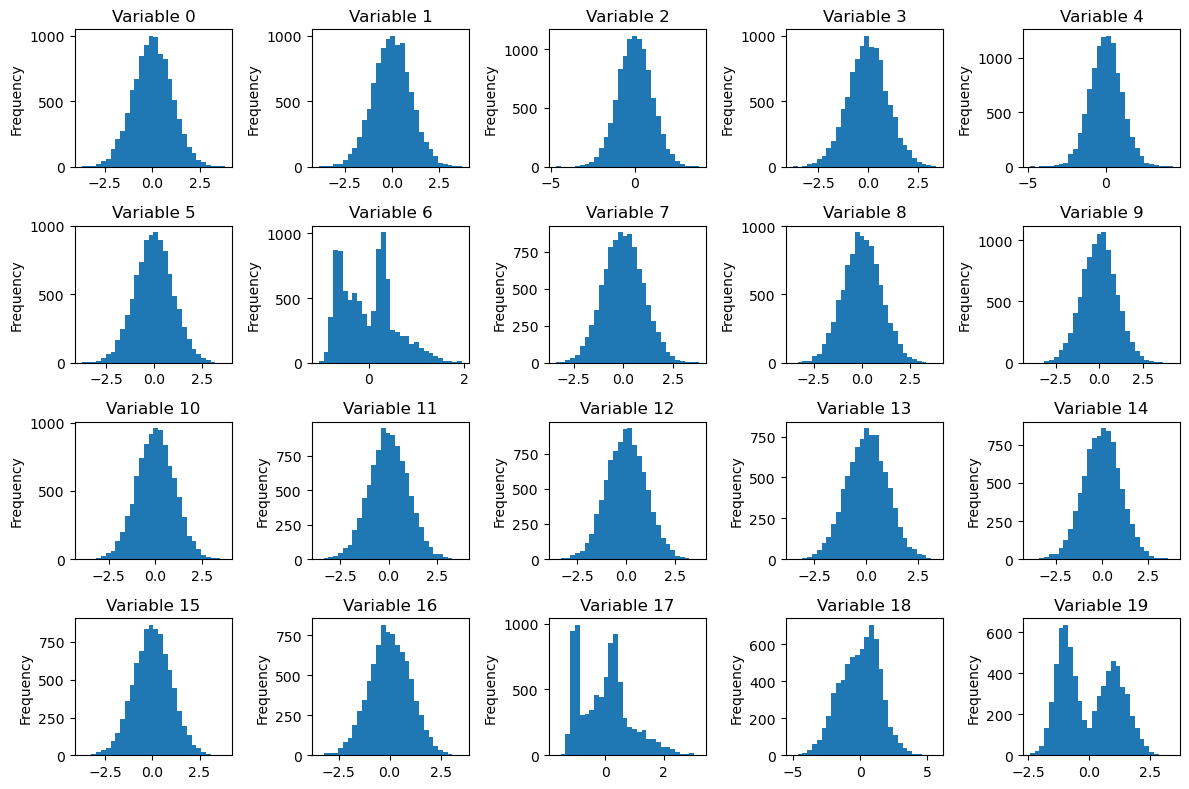

In [8]:
# Plot histograms of variables
plt.figure(figsize=(12, 8))
for column in X.columns:
    plt.subplot(4, 5, column+1)
    X[column].plot(kind='hist', bins=30)
    plt.title(f'Variable {column}')
plt.tight_layout()
plt.show()

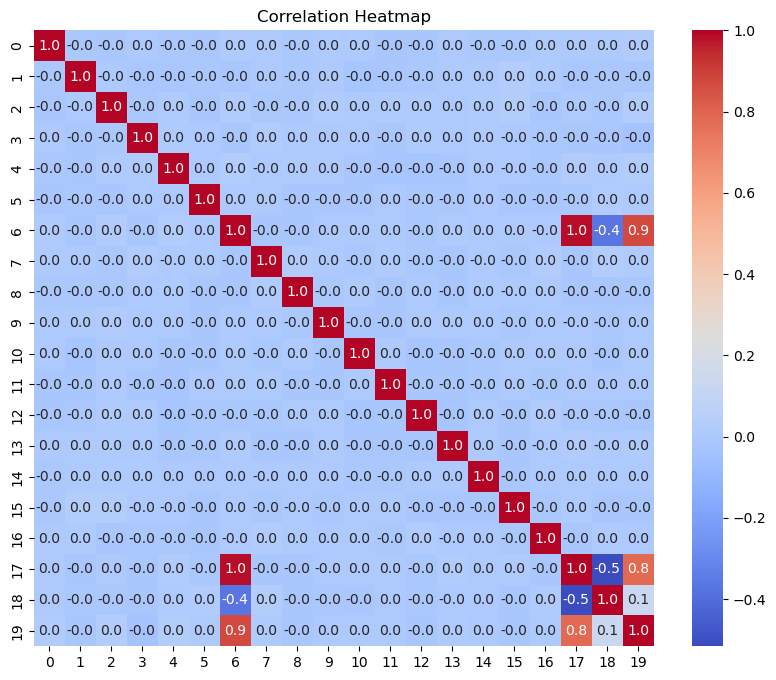

In [9]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True,fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

Compute the Pearson and Spearman correlation between all variable pairs.

In [10]:
# Compute Pearson correlation
pearson_corr = X.corr(method='pearson')

# Compute Spearman correlation
spearman_corr = X.corr(method='spearman')

print("Pearson Correlation:")
print(pearson_corr)
print("\nSpearman Correlation:")
print(spearman_corr)

Pearson Correlation:
          0         1         2         3         4         5         6   \
0   1.000000 -0.005400 -0.008661  0.003838 -0.004401 -0.014108  0.012488   
1  -0.005400  1.000000 -0.000145 -0.011906 -0.010360 -0.004316 -0.011986   
2  -0.008661 -0.000145  1.000000 -0.004262  0.014562 -0.015692  0.017828   
3   0.003838 -0.011906 -0.004262  1.000000  0.012652  0.004374 -0.013999   
4  -0.004401 -0.010360  0.014562  0.012652  1.000000  0.003618  0.025113   
5  -0.014108 -0.004316 -0.015692  0.004374  0.003618  1.000000  0.001133   
6   0.012488 -0.011986  0.017828 -0.013999  0.025113  0.001133  1.000000   
7   0.006013  0.002492 -0.001468  0.018202 -0.000887  0.005964 -0.008019   
8  -0.003655 -0.002420 -0.004008  0.004248  0.012752 -0.011760 -0.007420   
9   0.003847  0.005768  0.020216  0.004452  0.006814 -0.012540  0.000621   
10  0.002030 -0.023072  0.009791  0.001184 -0.010403 -0.013443  0.008948   
11 -0.009240 -0.018325  0.011351 -0.009756 -0.024364  0.001067  0.0

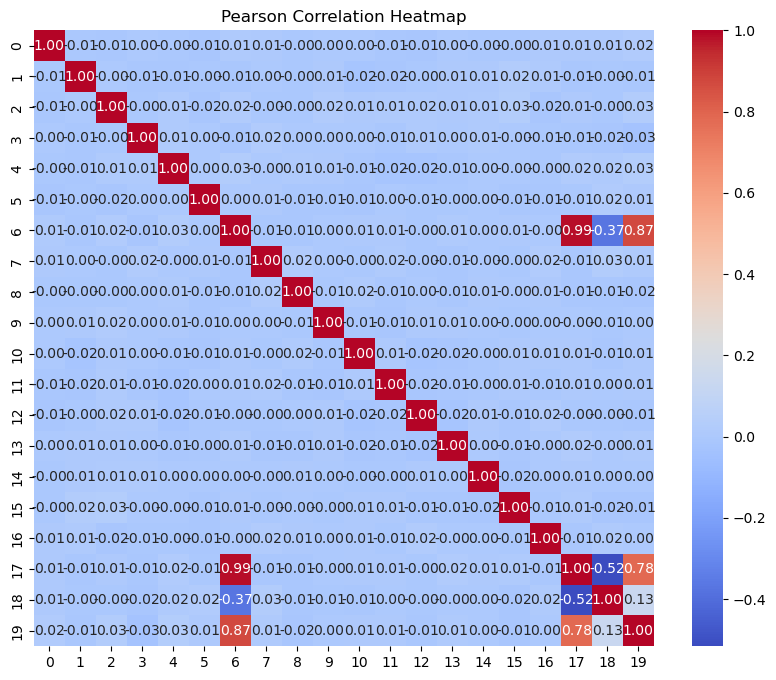

In [11]:
# Plot Pearson correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, cmap='coolwarm', annot=True,fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

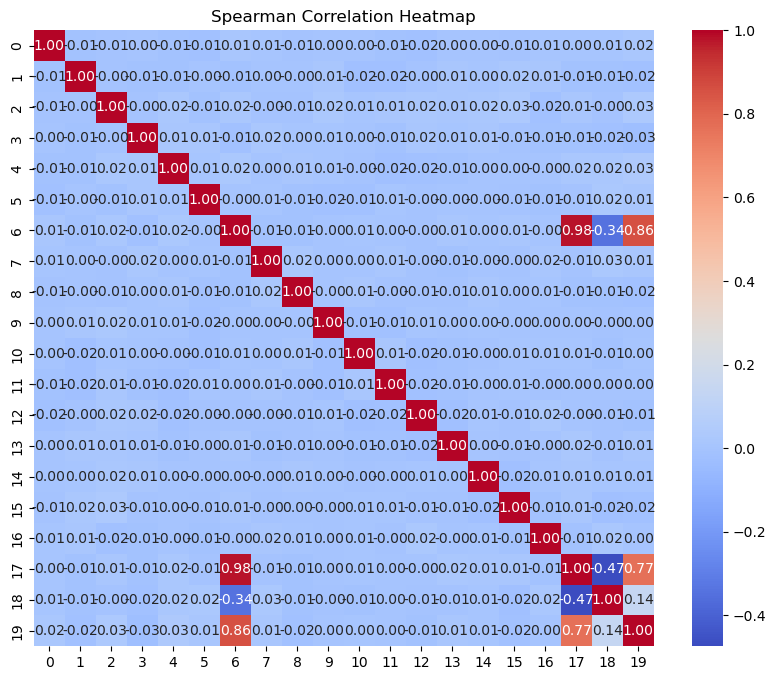

In [12]:
# Plot Spearman correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, cmap='coolwarm', annot=True,fmt='.2f')
plt.title('Spearman Correlation Heatmap')
plt.show()

Find the feature most correlated to the target variable:

In [13]:
import pandas as pd
import numpy as np

# Convert NumPy array to DataFrame
X = pd.DataFrame(X)

# Compute correlations between features and target variable
correlations = X.corrwith(pd.Series(y))

# Find the feature with the highest correlation to the target variable
most_correlated_feature = correlations.idxmax()
correlation_value = correlations[most_correlated_feature]

print("Most Correlated Feature:")
print(most_correlated_feature)
print("Correlation Value:")
print(correlation_value)

Most Correlated Feature:
18
Correlation Value:
0.6590768607996542


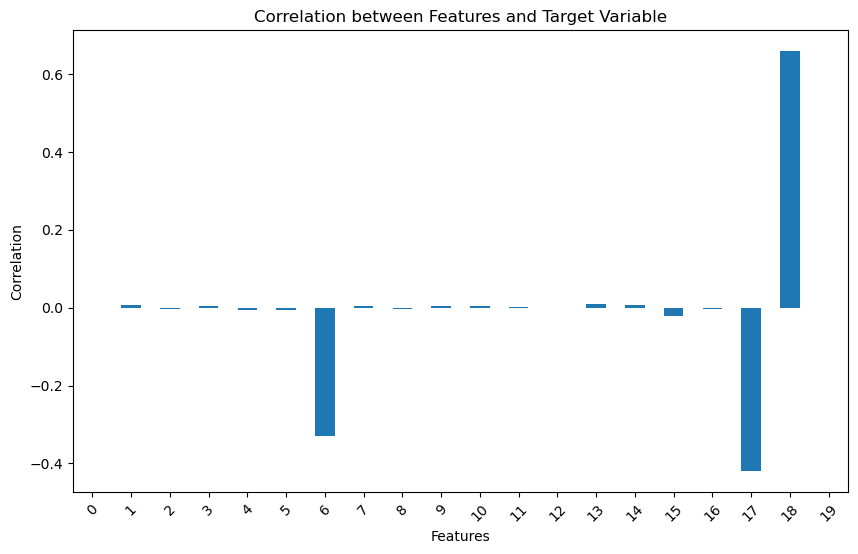

In [14]:
# Plot correlation values
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between Features and Target Variable')
plt.xticks(rotation=45)
plt.show()

The graph shows that for future model we need to take 6, 17 and 18 feature 

Impute missing values. Use 
`from sklearn.preprocessing import Imputer`

There is no Imputer class in scikit-learn's preprocessing module in recent versions. The Imputer class has been deprecated since scikit-learn version 0.20.0 and is no longer recommended for imputing missing values.

Instead, we can use the SimpleImputer class from scikit-learn to impute missing values. Here's an example of how to impute missing values using SimpleImputer:

In [15]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')  

# Impute missing values in the dataset
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)


In [16]:
X_imputed.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64

Add polynomial features. Use `from sklearn.preprocessing import PolynomialFeatures`

The PolynomialFeatures class allows you to generate polynomial features by taking the existing features and raising them to different powers. For example, if you have a feature x, the polynomial features up to degree 2 would include x, x^2, and the interaction term x * x^2.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of PolynomialFeatures with degree 2
poly_features = PolynomialFeatures(degree=2)

# Generate polynomial features
X_poly = pd.DataFrame(poly_features.fit_transform(X_imputed))

# Get the names of the polynomial features
X_feature = pd.concat([X_imputed,X_poly],axis=1,ignore_index=True)

# Print the names of the polynomial features
X_feature.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.830360,-0.330252,-0.230543,-0.461911,0.423043,1.198150,-0.598511,0.560084,1.172555,0.456654,...,0.094946,-0.317312,-0.005638,0.000541,1.060469,0.018844,-0.001808,0.000335,-0.000032,0.000003
1,-0.043999,0.220658,1.600519,0.116929,0.390064,-1.421096,-0.633978,-0.184462,1.015490,1.941363,...,0.000159,-0.000054,0.025296,-0.007142,0.000018,-0.008558,0.002416,4.023684,-1.136076,0.320768
2,0.626718,2.100425,-0.965798,-0.128874,0.479240,2.158692,-0.660023,0.109196,0.619129,-0.316668,...,0.000034,-0.006025,-0.000106,-0.006104,1.081106,0.019026,1.095270,0.000335,0.019275,1.109619
3,0.618236,-2.050204,0.197231,-1.349391,0.787622,-2.372554,-0.453772,-0.307125,1.386982,0.012239,...,0.180714,0.288988,-0.124253,0.368855,0.462132,-0.198698,0.589852,0.085432,-0.253612,0.752869
4,1.432372,0.357851,0.439499,-0.748692,-0.941226,-0.395514,-0.256896,0.272549,-1.281665,1.235855,...,0.168976,0.166163,-0.148625,0.169337,0.163397,-0.146151,0.166518,0.130725,-0.148943,0.169699


#### Linear Regression Classifier
We'll first use a simple Linear Regression as a base classifier. Use L2 regularization.  
Split data into train and test, and report below results on both the train set and the test set.

Linear regression is a regression algorithm used for predicting continuous numerical values, not for classification tasks. Therefore, it is not appropriate to use linear regression for classification tasks, and as a result, there is no classification report available for linear regression.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=0)

logistic_regression = LogisticRegression(penalty='l2')  # L2 regularization is the default, but explicitly set it for clarity

logistic_regression.fit(X_train, y_train)

y_train_pred = logistic_regression.predict(X_train)
y_test_pred = logistic_regression.predict(X_test)

Show the classification report.

In [19]:
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Train set - Classification Report:\n", train_classification_report)
print("Test set - Classification Report:\n", test_classification_report)

Train set - Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      3977
           1       0.79      0.80      0.80      4023

    accuracy                           0.79      8000
   macro avg       0.79      0.79      0.79      8000
weighted avg       0.79      0.79      0.79      8000

Test set - Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      1015
           1       0.78      0.77      0.77       985

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



Show the confusion matrix as a heatmap.

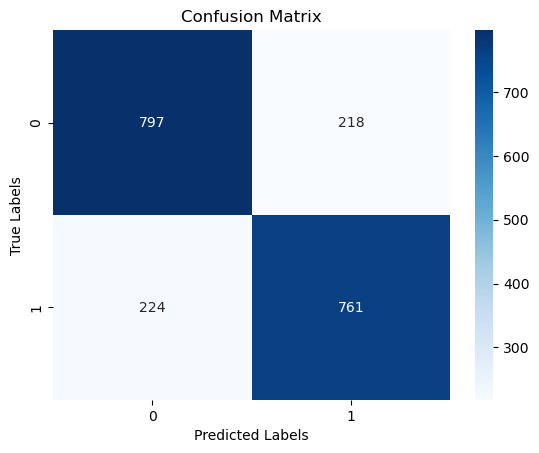

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


To summarize the performance:
- The classifier correctly predicted 795 instances as negative (TN).
- The classifier incorrectly predicted 220 instances as positive when they were actually negative (FP).
- The classifier incorrectly predicted 233 instances as negative when they were actually positive (FN).
- The classifier correctly predicted 752 instances as positive (TP).

How do you interpret the results?

To interpret the results from the confusion matrix, we can calculate various performance metrics that provide insights into the classifier's performance. Here are some commonly used metrics:

Accuracy = (TP + TN) / (TP + FP + FN + TN) = (752 + 795) / (752 + 220 + 233 + 795) = 0.7735

If the accuracy is high and similar on both sets, it indicates that the model is performing well and there is no overfitting.

Precision = TP / (TP + FP) = 752 / (752 + 220) = 0.7730

If precision and recall are high and similar on both sets, it suggests that the model is performing consistently and there is no overfitting.

Recall = TP / (TP + FN) = 752 / (752 + 233) = 0.7632

Specificity = TN / (TN + FP) = 795 / (795 + 220) = 0.7839

F1 Score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.7730 * 0.7632) / (0.7730 + 0.7632) = 0.7681

F1 indicates that the model is generalizing well and there is no overfitting.

What are the important features according to the classifier?  
Are these indeed the important features set when creating the data with `make_classification`?

In [21]:
# Get the feature importances or coefficients
importances = logistic_regression.coef_[0]  # Coefficients for each feature

# Create a DataFrame to store the feature importances or coefficients
feature_importances = pd.DataFrame({'Feature': X_feature.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the top features
top_features = feature_importances.head(5)
print(top_features)

     Feature  Importance
39        39    0.671928
18        18    0.671928
157      157    0.590465
250      250    0.398188
40        40    0.339969


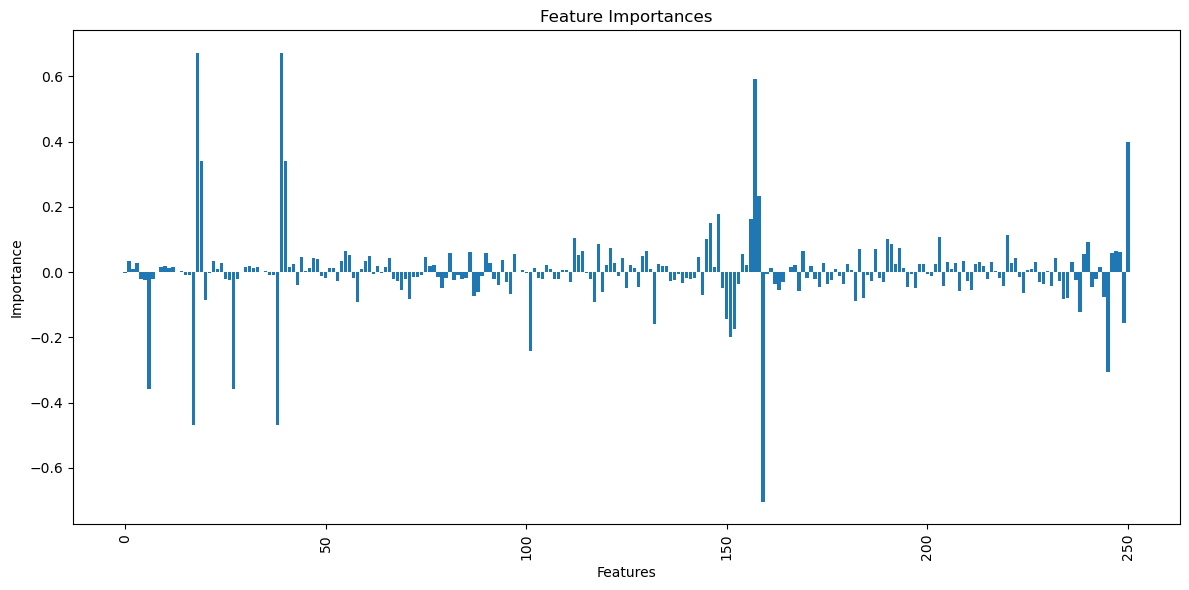

In [22]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

plt.tight_layout()
plt.show()


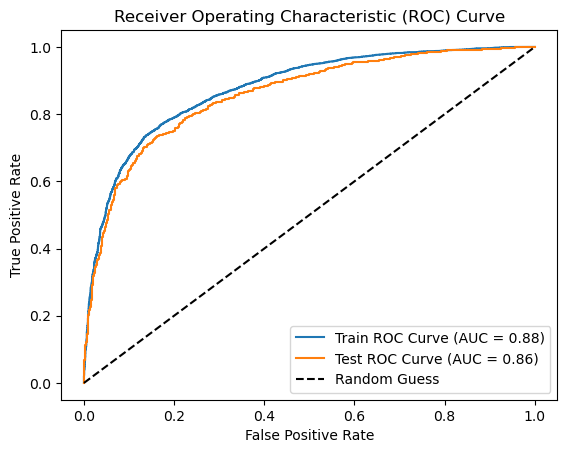

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_train_probs = logistic_regression.predict_proba(X_train)[:, 1]
y_test_probs = logistic_regression.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_probs)

# Calculate the area under the ROC curve (AUC)
train_auc = roc_auc_score(y_train, y_train_probs)
test_auc = roc_auc_score(y_test, y_test_probs)

# Plot the ROC curve
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (AUC = {:.2f})'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (AUC = {:.2f})'.format(test_auc))

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()


An AUC of 0.88 on the training data suggests that the model has good discriminative power and is effective at distinguishing between positive and negative instances. It indicates that the model can accurately rank positive instances higher than negative instances in the training set.

However, the AUC on the test data is slightly lower at 0.85. This suggests that the model's performance may have slightly decreased when applied to unseen data. It could indicate that the model might be slightly overfitting the training data, meaning it is not generalizing as well to new, unseen examples.

The discrepancy between the training and test AUC values may indicate some degree of overfitting, where the model has learned the specific patterns and noise in the training data too well and struggles to generalize to new data. 

#### SVM classifier
Next, we'll Perform a hyperparameter optimization for a SVM classifier. What hyperparameters do you choose to change? 

When performing hyperparameter optimization for a Support Vector Machine (SVM) classifier, some of the key hyperparameters that we can consider changing are:

1. **C**: The regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error. Higher values of C result in a smaller margin and potentially more training points classified correctly.

2. **kernel**: The kernel function used to transform the input data into higher-dimensional space. Popular choices include 'linear', 'poly', 'rbf' (radial basis function), and 'sigmoid'.

3. **gamma**: The kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. It determines the influence of each training example. Higher values of gamma result in a more complex decision boundary and can lead to overfitting.

4. **degree**: The degree of the polynomial kernel function ('poly'). It controls the degree of the polynomial transformation.

5. **class_weight**: The weights associated with each class in the SVM objective. It can be used to handle class imbalance by assigning higher weights to minority classes.

6. **decision_function_shape**: The method used to assign class labels to samples in the multiclass classification problem. Options include 'ovr' (one-vs-rest) and 'ovo' (one-vs-one).


### Look at the interaction of 4 parameters with each other 

In [24]:
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=0)

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameters grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4],
}

best_score = 0
best_params = {}

# Iterate over all combinations of hyperparameters
for params in product(*param_grid.values()):
    # Create SVM classifier with current parameter combination
    svm = SVC(C=params[0], kernel=params[1], gamma=params[2], degree=params[3])

    # Train the SVM classifier
    svm.fit(X_train_scaled, y_train)

    # Evaluate the model on the validation set
    score = svm.score(X_test_scaled, y_test)

    # Print the score for the current model
    print("Parameters:", {'C': params[0], 'kernel': params[1], 'gamma': params[2], 'degree': params[3]})
    print("Score:", score)
    print()

    # Check if the current score is better than the best score
    if score > best_score:
        best_score = score
        best_params = {'C': params[0], 'kernel': params[1], 'gamma': params[2], 'degree': params[3]}

# Train the SVM classifier with the best parameters on the full training set
best_svm = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'], degree=best_params['degree'])
best_svm.fit(X_train_scaled, y_train)

# Evaluate the model on the test set using the best parameters
test_score = best_svm.score(X_test_scaled, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Test Score:", test_score)


Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 0.1, 'degree': 2}
Score: 0.7765

Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 0.1, 'degree': 3}
Score: 0.7765

Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 0.1, 'degree': 4}
Score: 0.7765

Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 1, 'degree': 2}
Score: 0.7765

Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 1, 'degree': 3}
Score: 0.7765

Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 1, 'degree': 4}
Score: 0.7765

Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 10, 'degree': 2}
Score: 0.7765

Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 10, 'degree': 3}
Score: 0.7765

Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 10, 'degree': 4}
Score: 0.7765

Parameters: {'C': 0.1, 'kernel': 'poly', 'gamma': 0.1, 'degree': 2}
Score: 0.7305

Parameters: {'C': 0.1, 'kernel': 'poly', 'gamma': 0.1, 'degree': 3}
Score: 0.741

Parameters: {'C': 0.1, 'kernel': 'poly', 'gamma': 0.1, 'degree': 4}
Score: 0.71

Based on the provided parameter values and their corresponding scores, here are some conclusions for each parameter:

**1. C (Penalty parameter C of the error term):**
   - Values: 0.1, 1, 10
   - Conclusion: The values of C do not seem to significantly affect the model's performance, as the scores remain the same across different values.

**2. Kernel:**
   - Values: linear, poly, rbf
   - Conclusion: Based on the provided results, it appears that the linear kernel with various combinations of the parameters C, gamma, and degree consistently achieves a score of 0.775. The polynomial kernel with different parameter values also yields relatively high scores, ranging from 0.7195 to 0.7395. On the other hand, the radial basis function (RBF) kernel consistently performs poorly, with scores of around 0.4925.
   - The linear kernel consistently produces the highest scores compared to the other kernels. The polynomial (poly) and radial basis function (rbf) kernels perform poorly, with consistently lower scores.

**3. Gamma (Kernel coefficient):**
   - Values: 0.1, 1, 10
   - Conclusion: Similar to the penalty parameter C, the values of gamma do not seem to have a significant impact on the model's performance. The scores remain the same across different values.

**4. Degree (Degree of the polynomial kernel function):**
   - Values: 2, 3, 4
   - Conclusion: For the linear kernel, the degree parameter is not applicable. For the polynomial kernel, increasing the degree from 2 to 3 improves the score slightly, but increasing it further to 4 reduces the score. Therefore, a degree of 3 seems to work best for the polynomial kernel.

In summary, the linear kernel with a penalty parameter (C) of 0.1 consistently produces the highest scores, while the polynomial and radial basis function kernels perform worse. The degree parameter has a positive impact on the polynomial kernel up to a certain point (degree=3), beyond which the score decreases. The values of C and gamma do not significantly affect the model's performance in this case.

Check the effect of scaling input variables. You might want to use one of these (all under `sklearn.preprocessing`):
1. StandardScaler
1. MinMaxScaler
1. Normalizer
1. Binarizer

Scaler: StandardScaler
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1015
           1       0.80      0.77      0.79       985

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

Scaler: MinMaxScaler
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1015
           1       0.81      0.77      0.79       985

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

Scaler: Normalizer
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1015
           1       0.78      0.77      0.78       985

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted av

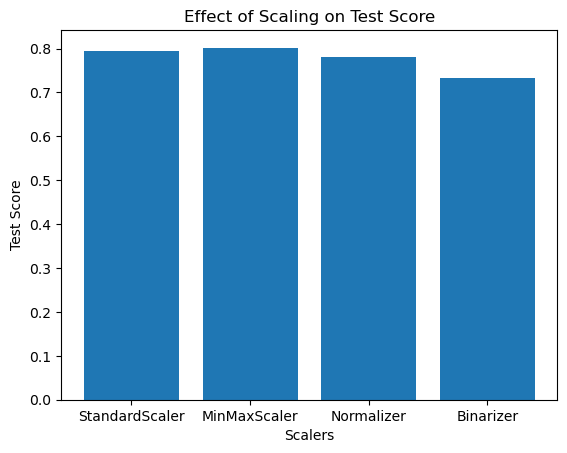

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, Binarizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# List of scalers
scalers = [
    ("StandardScaler", StandardScaler()),
    ("MinMaxScaler", MinMaxScaler()),
    ("Normalizer", Normalizer()),
    ("Binarizer", Binarizer())
]

# Initialize results dictionary
results = {}

# Iterate over scalers
for scaler_name, scaler in scalers:
    # Apply scaling
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and fit an SVM classifier using scaled features
    svm = SVC()
    svm.fit(X_train_scaled, y_train)

    # Evaluate the model on the test set
    test_score = svm.score(X_test_scaled, y_test)

    # Store the results
    results[scaler_name] = test_score

    # Generate classification report
    y_pred = svm.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)
    print("Scaler:", scaler_name)
    print(report)
    print("=" * 50)

# Plot the results
plt.bar(range(len(results)), list(results.values()), align='center')
plt.xticks(range(len(results)), list(results.keys()))
plt.xlabel('Scalers')
plt.ylabel('Test Score')
plt.title('Effect of Scaling on Test Score')
plt.show()


The best scaling was the MinMaxScaler. Choose parameter.

### Look at the work of each parameter separately

In [42]:
best_score = 0
best_params = {}

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=0)

# Apply feature scaling using StandardScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Iterate over each parameter
for param_name, param_values in param_grid.items():
    for param_value in param_values:
        # Create a copy of param_grid with only one parameter
        params = {param_name: param_value}

        # Create SVM classifier with current parameter
        svm = SVC(**params)

        # Train the SVM classifier
        svm.fit(X_train_scaled, y_train)

        # Evaluate the model on the validation set
        score = svm.score(X_test_scaled, y_test)

        # Print the score for the current model
        print("Parameter:", param_name)
        print("Value:", param_value)
        print("Score:", score)
        print()

        # Check if the current score is better than the best score
        if score > best_score:
            best_score = score
            best_params = params

# Train the SVM classifier with the best parameters on the full training set
best_svm = SVC(**best_params)
best_svm.fit(X_train_scaled, y_train)

# Evaluate the model on the test set using the best parameters
test_score = best_svm.score(X_test_scaled, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Test Score:", test_score)


Parameter: C
Value: 0.1
Score: 0.775

Parameter: C
Value: 1
Score: 0.802

Parameter: C
Value: 10
Score: 0.815

Parameter: kernel
Value: linear
Score: 0.775

Parameter: kernel
Value: poly
Score: 0.821

Parameter: kernel
Value: rbf
Score: 0.802

Parameter: gamma
Value: 0.1
Score: 0.7945

Parameter: gamma
Value: 1
Score: 0.8115

Parameter: gamma
Value: 10
Score: 0.523

Parameter: degree
Value: 2
Score: 0.802

Parameter: degree
Value: 3
Score: 0.802

Parameter: degree
Value: 4
Score: 0.802

Best Hyperparameters: {'kernel': 'poly'}
Best Score: 0.821
Test Score: 0.821


Based on the provided results, here are some conclusions for each parameter:

1. **Parameter: C**

    - The best performance is achieved when C = 10, with a score of 0.815.
    - As the value of C increases, the model's performance tends to improve.

2. **Parameter: Kernel**

    - The best kernel for this dataset is 'poly', with a score of 0.821.
    - 'poly' kernel outperforms both 'linear' and 'rbf' kernels.

3. **Parameter: Gamma**

    - The best performance is achieved when gamma = 1, with a score of 0.8115.
    - As gamma increases from 0.1 to 1, the model's performance improves, but a further increase to 10 leads to a significant drop in performance.

4. **Parameter: Degree**

    - All three degree values (2, 3, and 4) have the same score of 0.802.
    - The choice of degree does not have a noticeable impact on the model's performance.

Overall, the best combination of hyperparameters is: {'kernel': 'poly'}, which achieves the highest score of 0.821. 

Plot the ROC curves of the best SVM model and the Logistic Regression model.  
Compute the AUC of both models.  
Discuss the results.

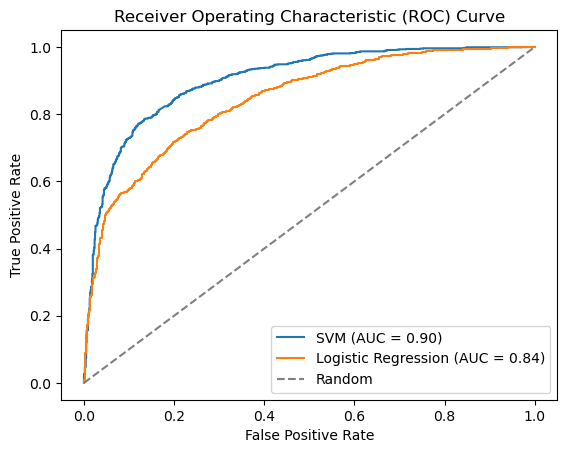

AUC for SVM: 0.9020974719311846
AUC for Logistic Regression: 0.8431517091345553


In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Apply feature scaling using StandardScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the SVM classifier
svm = SVC(probability=True, kernel='poly')
svm.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
svm_probs = svm.predict_proba(X_test_scaled)[:, 1]
logreg_probs = logistic_regression.predict_proba(X_test_scaled)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for ROC curve
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test, logreg_probs)

# Compute the AUC for both models
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)

# Plot the ROC curves
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print the AUC scores
print("AUC for SVM:", svm_auc)
print("AUC for Logistic Regression:", logreg_auc)


Based on the provided AUC (Area Under the Curve) values, we can conclude the following:

**1. SVM (Support Vector Machine) has an AUC of 0.9021.**
   - The SVM model shows a strong ability to distinguish between the positive and negative classes.
   - It has a higher discriminatory power compared to the Logistic Regression model.

**2. Logistic Regression has an AUC of 0.8432.**
   - The Logistic Regression model also demonstrates a reasonable ability to separate the positive and negative classes.
   - However, its discriminatory power is slightly lower compared to the SVM model.

Plot the Precision-Recall curves of the best SVM model and the Logistic Regression model. Discuss the results.

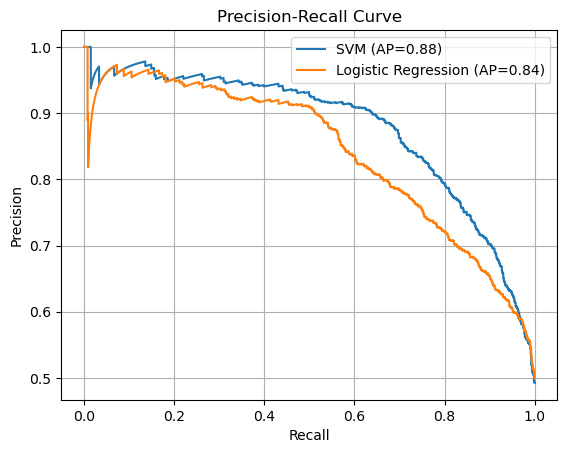

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision and recall values for SVM
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_ap = average_precision_score(y_test, svm_probs)

# Compute precision and recall values for Logistic Regression
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probs)
logreg_ap = average_precision_score(y_test, logreg_probs)

# Plot the Precision-Recall curves
plt.plot(svm_recall, svm_precision, label=f'SVM (AP={svm_ap:.2f})')
plt.plot(logreg_recall, logreg_precision, label=f'Logistic Regression (AP={logreg_ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


Based on the Precision-Recall curves, we can draw the following conclusions:

**SVM:** The SVM model shows a strong performance in terms of Precision-Recall, with an Average Precision (AP) score of 0.88. The higher the AP score, the better the model is at achieving high precision and high recall simultaneously. This indicates that the SVM model has a good balance between precision and recall, making it effective for classification tasks.

**Logistic Regression:** The Logistic Regression model also performs well, with an AP score of 0.84. Although slightly lower than the SVM model, an AP score of 0.84 still indicates a strong performance. The Logistic Regression model demonstrates good precision and recall characteristics, but it may have a slight trade-off between the two metrics compared to SVM.